<a href="https://colab.research.google.com/github/Epilef86/Regressao_/blob/main/Kaggle_Pre%C3%A7o_Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/leaderboard

In [389]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [390]:
teste = pd.read_csv('/content/test.csv')

In [391]:
treino = pd.read_csv('/content/train.csv')

In [392]:
teste.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [393]:
teste.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [394]:
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Como são 80 colunas, antes de saber o que cada uma é, melhor verificar como os dados tratados

In [395]:
treino.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [396]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [397]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

Verificamos que existem colunas com valores não nulos muito pequenos quando comparado com as entradas.

Vamos aplicar a correlação pra saber quais parâmetros são mais relacionados com o SalePrice (preço da casa). Ou seja, obter correlação com a variável de destino

https://stackabuse.com/bytes/calculate-correlation-of-dataframe-featurescolumns-with-pandas/

Irei plotar um gráfico de correlação com o preço da casa em ordem de importância.

<AxesSubplot:>

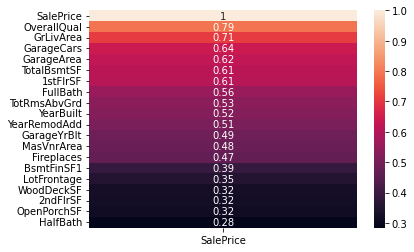

In [398]:
corr = treino.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(20)
sns.heatmap(corr, annot=True)

Verificar se tem correlação negativa. Ela tem importância na desvalorização do imóvel, portanto é bom fazer a análise dela. As correlações variam entre -1 e 1, quanto mais próximo de -1 mais influencia inversamente no preço da casa. Quanto mais próximo de 1 influencia positivamente no preço da casa

<AxesSubplot:>

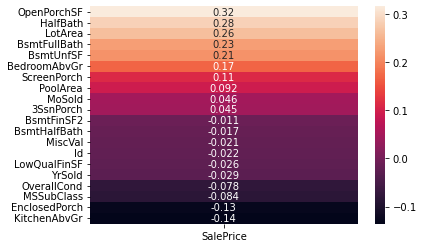

In [399]:
corr = treino.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).tail(20)
sns.heatmap(corr, annot=True)

Observe que a correlação só pega dados numéricos, os que são categóricos não entram na análise.

Quanto se tem muitas variáveis o idela é que se faça escolhas de quais são mais relevantes pra a análise. Vamos ler as variáveis categóricas pra saber qual tem mais importância, lendo a documentação.

As variáveis consideradas relevantes são:LotShape, Neighborhood, Condition1, Condition2, ExterQual , Heating, PavedDrive, MiscFeature  


Forma geral da propriedade --> usaria

In [400]:
treino['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Não colocaria Neighborhood pois têm muitos bairros diferentes

In [401]:
treino['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Não utilizaria a condition 1 pq são muitos dados do tipo normal e poucos dos demais, só vai confundir o modelo. 

In [402]:
treino['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Não utilizaria a condition 2 pq são muitos dados do tipo normal e poucos dos demais, só vai confundir o modelo. 

In [403]:
treino['Condition2'].value_counts()

Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

qualidade do material exterior, usaria

In [404]:
treino['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

In [405]:
treino['Heating'].value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Estrada pavimentada, não usaria pq têm muitos dados de um tipo

In [406]:
treino['PavedDrive'].value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

 Diversos recursos não cobertos em outras categorias --> não pegaria pois têm muitas dados de uma só

In [407]:
treino['MiscFeature'].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

Analisando cada coluna, usaria apenas 2: ExterQual, LotShape

VAmos juntar os daatsets de treino e teste pq o que alterar em um altera no outro, deixando os dois no mesmo moldes, depois separamos e fazemos a análise individualmente.

In [408]:
treino_teste = pd.concat([treino, teste], axis = 0).reset_index()
treino_teste.drop('index', axis=1, inplace=True)
treino_teste

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
2915,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
2916,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
2917,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


Selecionar as 2 colunas categóricas e adicionar com as numérica. E das numéricas selecionaria as que são acima de 50% de correlação e as 2 últimas menos correlacionadas

In [409]:
treino_teste = treino_teste[['LotShape', 'ExterQual', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath',
'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'EnclosedPorch', 'KitchenAbvGr', 'SalePrice']]

In [410]:
treino_teste.head()

,LotShape,ExterQual,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,EnclosedPorch,KitchenAbvGr,SalePrice
0,Reg,Gd,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,0,1,208500.0
1,Reg,TA,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,0,1,181500.0
2,IR1,Gd,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,0,1,223500.0
3,IR1,TA,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,272,1,140000.0
4,IR1,Gd,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,0,1,250000.0


Verificar se tem valores nulos ou duplicados

In [411]:
treino_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotShape       2919 non-null   object 
 1   ExterQual      2919 non-null   object 
 2   OverallQual    2919 non-null   int64  
 3   GrLivArea      2919 non-null   int64  
 4   GarageCars     2918 non-null   float64
 5   GarageArea     2918 non-null   float64
 6   TotalBsmtSF    2918 non-null   float64
 7   1stFlrSF       2919 non-null   int64  
 8   FullBath       2919 non-null   int64  
 9   TotRmsAbvGrd   2919 non-null   int64  
 10  YearBuilt      2919 non-null   int64  
 11  YearRemodAdd   2919 non-null   int64  
 12  EnclosedPorch  2919 non-null   int64  
 13  KitchenAbvGr   2919 non-null   int64  
 14  SalePrice      1460 non-null   float64
dtypes: float64(4), int64(9), object(2)
memory usage: 342.2+ KB


Como SalePreice é a variável target ela não vai ter dados preenchidos no dataset de teste, pois eles vao ser preditos

In [412]:
#preenchendo a linha 4,5,6 com a moda
treino_teste['GarageCars'].fillna(treino_teste['GarageCars'].mode()[0], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [413]:
treino_teste['GarageArea'].fillna(treino_teste['GarageArea'].mode()[0], inplace=True)

In [414]:
treino_teste['TotalBsmtSF'].fillna(treino_teste['TotalBsmtSF'].mode()[0], inplace=True)

In [415]:
treino_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotShape       2919 non-null   object 
 1   ExterQual      2919 non-null   object 
 2   OverallQual    2919 non-null   int64  
 3   GrLivArea      2919 non-null   int64  
 4   GarageCars     2919 non-null   float64
 5   GarageArea     2919 non-null   float64
 6   TotalBsmtSF    2919 non-null   float64
 7   1stFlrSF       2919 non-null   int64  
 8   FullBath       2919 non-null   int64  
 9   TotRmsAbvGrd   2919 non-null   int64  
 10  YearBuilt      2919 non-null   int64  
 11  YearRemodAdd   2919 non-null   int64  
 12  EnclosedPorch  2919 non-null   int64  
 13  KitchenAbvGr   2919 non-null   int64  
 14  SalePrice      1460 non-null   float64
dtypes: float64(4), int64(9), object(2)
memory usage: 342.2+ KB


Tranformando variáveis categóricas em numéricas

In [416]:
from sklearn.preprocessing import LabelEncoder

In [417]:
# criando instância do labelencoder 
labelencoder = LabelEncoder()
# Atribuindo valores numéricos e armazenando em outra coluna 
treino_teste['LotShape'] = labelencoder.fit_transform(treino_teste['LotShape']) 


<ipython-input-417-b6e93e792720>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_teste['LotShape'] = labelencoder.fit_transform(treino_teste['LotShape'])


In [418]:
treino_teste['ExterQual'] = labelencoder.fit_transform(treino_teste['ExterQual']) 

<ipython-input-418-0f1c6373a7a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treino_teste['ExterQual'] = labelencoder.fit_transform(treino_teste['ExterQual'])


In [419]:
treino_teste

,LotShape,ExterQual,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,EnclosedPorch,KitchenAbvGr,SalePrice
0,3,2,7,1710,2.0,548.0,856.0,856,2,8,2003,2003,0,1,208500.0
1,3,3,6,1262,2.0,460.0,1262.0,1262,2,6,1976,1976,0,1,181500.0
2,0,2,7,1786,2.0,608.0,920.0,920,2,6,2001,2002,0,1,223500.0
3,0,3,7,1717,3.0,642.0,756.0,961,1,7,1915,1970,272,1,140000.0
4,0,2,8,2198,3.0,836.0,1145.0,1145,2,9,2000,2000,0,1,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,3,3,4,1092,0.0,0.0,546.0,546,1,5,1970,1970,0,1,NaN
2915,3,3,4,1092,1.0,286.0,546.0,546,1,6,1970,1970,0,1,NaN
2916,3,3,5,1224,2.0,576.0,1224.0,1224,1,7,1960,1996,0,1,NaN
2917,3,3,5,970,0.0,0.0,912.0,970,1,6,1992,1992,0,1,NaN


Verificando a presença de outliers pra ver se existe alguma linha a ser removida 

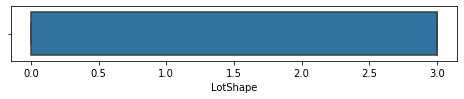

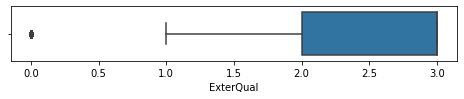

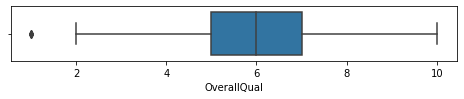

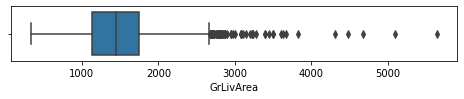

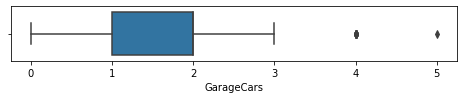

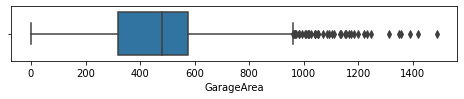

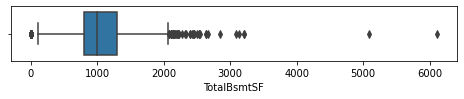

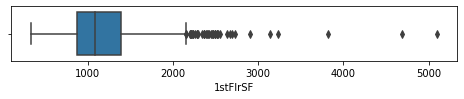

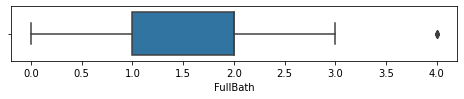

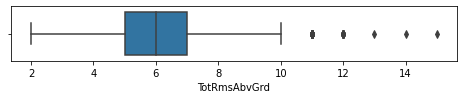

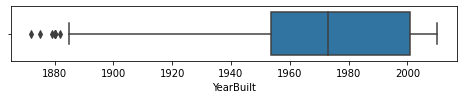

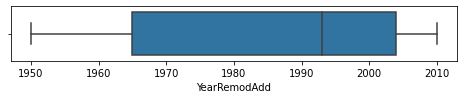

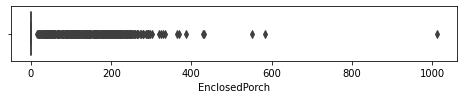

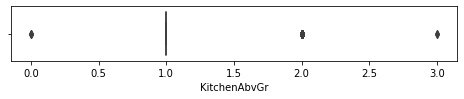

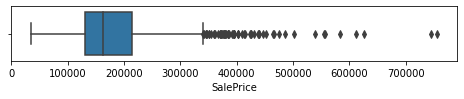

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in treino_teste:
        plt.figure(figsize=(8,1))
        sns.boxplot(data=treino_teste, x=column)

Removendo 1% dos maiores e menores valores, sendo que tem que ser de alguma coluna de correlação positiva.

https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe

In [421]:
from scipy import stats

In [422]:
'''q = treino_teste["OverallQual"].quantile(0.99)

treino_teste[treino_teste["OverallQual"] < q]

q_low = treino_teste["OverallQual"].quantile(0.01)
q_hi  = treino_teste["OverallQual"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["OverallQual"] < q_hi) & (treino_teste["OverallQual"] > q_low)]'''

'q = treino_teste["OverallQual"].quantile(0.99)\n\ntreino_teste[treino_teste["OverallQual"] < q]\n\nq_low = treino_teste["OverallQual"].quantile(0.01)\nq_hi  = treino_teste["OverallQual"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["OverallQual"] < q_hi) & (treino_teste["OverallQual"] > q_low)]'

In [423]:
'''q = treino_teste["GrLivArea"].quantile(0.99)

treino_teste[treino_teste["GrLivArea"] < q]

q_low = treino_teste["GrLivArea"].quantile(0.01)
q_hi  = treino_teste["GrLivArea"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["GrLivArea"] < q_hi) & (treino_teste["GrLivArea"] > q_low)]'''

'q = treino_teste["GrLivArea"].quantile(0.99)\n\ntreino_teste[treino_teste["GrLivArea"] < q]\n\nq_low = treino_teste["GrLivArea"].quantile(0.01)\nq_hi  = treino_teste["GrLivArea"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["GrLivArea"] < q_hi) & (treino_teste["GrLivArea"] > q_low)]'

In [424]:
'''q = treino_teste["GarageCars"].quantile(0.99)

treino_teste[treino_teste["GarageCars"] < q]

q_low = treino_teste["GarageCars"].quantile(0.01)
q_hi  = treino_teste["GarageCars"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["GarageCars"] < q_hi) & (treino_teste["GarageCars"] > q_low)]'''

'q = treino_teste["GarageCars"].quantile(0.99)\n\ntreino_teste[treino_teste["GarageCars"] < q]\n\nq_low = treino_teste["GarageCars"].quantile(0.01)\nq_hi  = treino_teste["GarageCars"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["GarageCars"] < q_hi) & (treino_teste["GarageCars"] > q_low)]'

In [425]:
'''q = treino_teste["GarageArea"].quantile(0.99)

treino_teste[treino_teste["GarageArea"] < q]

q_low = treino_teste["GarageArea"].quantile(0.01)
q_hi  = treino_teste["GarageArea"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["GarageArea"] < q_hi) & (treino_teste["GarageArea"] > q_low)]'''

'q = treino_teste["GarageArea"].quantile(0.99)\n\ntreino_teste[treino_teste["GarageArea"] < q]\n\nq_low = treino_teste["GarageArea"].quantile(0.01)\nq_hi  = treino_teste["GarageArea"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["GarageArea"] < q_hi) & (treino_teste["GarageArea"] > q_low)]'

In [426]:
'''q = treino_teste["TotalBsmtSF"].quantile(0.99)

treino_teste[treino_teste["TotalBsmtSF"] < q]

q_low = treino_teste["TotalBsmtSF"].quantile(0.01)
q_hi  = treino_teste["TotalBsmtSF"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["TotalBsmtSF"] < q_hi) & (treino_teste["TotalBsmtSF"] > q_low)]'''

'q = treino_teste["TotalBsmtSF"].quantile(0.99)\n\ntreino_teste[treino_teste["TotalBsmtSF"] < q]\n\nq_low = treino_teste["TotalBsmtSF"].quantile(0.01)\nq_hi  = treino_teste["TotalBsmtSF"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["TotalBsmtSF"] < q_hi) & (treino_teste["TotalBsmtSF"] > q_low)]'

In [427]:
'''q = treino_teste["1stFlrSF"].quantile(0.99)

treino_teste[treino_teste["1stFlrSF"] < q]

q_low = treino_teste["1stFlrSF"].quantile(0.01)
q_hi  = treino_teste["1stFlrSF"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["1stFlrSF"] < q_hi) & (treino_teste["1stFlrSF"] > q_low)]'''

'q = treino_teste["1stFlrSF"].quantile(0.99)\n\ntreino_teste[treino_teste["1stFlrSF"] < q]\n\nq_low = treino_teste["1stFlrSF"].quantile(0.01)\nq_hi  = treino_teste["1stFlrSF"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["1stFlrSF"] < q_hi) & (treino_teste["1stFlrSF"] > q_low)]'

In [428]:
'''q = treino_teste["FullBath"].quantile(0.99)

treino_teste[treino_teste["FullBath"] < q]

q_low = treino_teste["FullBath"].quantile(0.01)
q_hi  = treino_teste["FullBath"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["FullBath"] < q_hi) & (treino_teste["FullBath"] > q_low)]'''

'q = treino_teste["FullBath"].quantile(0.99)\n\ntreino_teste[treino_teste["FullBath"] < q]\n\nq_low = treino_teste["FullBath"].quantile(0.01)\nq_hi  = treino_teste["FullBath"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["FullBath"] < q_hi) & (treino_teste["FullBath"] > q_low)]'

In [429]:
'''q = treino_teste["TotRmsAbvGrd"].quantile(0.99)

treino_teste[treino_teste["TotRmsAbvGrd"] < q]

q_low = treino_teste["TotRmsAbvGrd"].quantile(0.01)
q_hi  = treino_teste["TotRmsAbvGrd"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["TotRmsAbvGrd"] < q_hi) & (treino_teste["TotRmsAbvGrd"] > q_low)]'''

'q = treino_teste["TotRmsAbvGrd"].quantile(0.99)\n\ntreino_teste[treino_teste["TotRmsAbvGrd"] < q]\n\nq_low = treino_teste["TotRmsAbvGrd"].quantile(0.01)\nq_hi  = treino_teste["TotRmsAbvGrd"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["TotRmsAbvGrd"] < q_hi) & (treino_teste["TotRmsAbvGrd"] > q_low)]'

In [430]:
'''q = treino_teste["YearBuilt"].quantile(0.99)

treino_teste[treino_teste["YearBuilt"] < q]

q_low = treino_teste["YearBuilt"].quantile(0.01)
q_hi  = treino_teste["YearBuilt"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["YearBuilt"] < q_hi) & (treino_teste["YearBuilt"] > q_low)]'''

'q = treino_teste["YearBuilt"].quantile(0.99)\n\ntreino_teste[treino_teste["YearBuilt"] < q]\n\nq_low = treino_teste["YearBuilt"].quantile(0.01)\nq_hi  = treino_teste["YearBuilt"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["YearBuilt"] < q_hi) & (treino_teste["YearBuilt"] > q_low)]'

In [431]:
'''q = treino_teste["YearRemodAdd"].quantile(0.99)

treino_teste[treino_teste["YearRemodAdd"] < q]

q_low = treino_teste["YearRemodAdd"].quantile(0.01)
q_hi  = treino_teste["YearRemodAdd"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["YearRemodAdd"] < q_hi) & (treino_teste["YearRemodAdd"] > q_low)]'''

'q = treino_teste["YearRemodAdd"].quantile(0.99)\n\ntreino_teste[treino_teste["YearRemodAdd"] < q]\n\nq_low = treino_teste["YearRemodAdd"].quantile(0.01)\nq_hi  = treino_teste["YearRemodAdd"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["YearRemodAdd"] < q_hi) & (treino_teste["YearRemodAdd"] > q_low)]'

In [432]:
'''q = treino_teste["SalePrice"].quantile(0.99)

treino_teste[treino_teste["SalePrice"] < q]

q_low = treino_teste["SalePrice"].quantile(0.01)
q_hi  = treino_teste["SalePrice"].quantile(0.99)

treino_teste = treino_teste[(treino_teste["SalePrice"] < q_hi) & (treino_teste["SalePrice"] > q_low)]'''

'q = treino_teste["SalePrice"].quantile(0.99)\n\ntreino_teste[treino_teste["SalePrice"] < q]\n\nq_low = treino_teste["SalePrice"].quantile(0.01)\nq_hi  = treino_teste["SalePrice"].quantile(0.99)\n\ntreino_teste = treino_teste[(treino_teste["SalePrice"] < q_hi) & (treino_teste["SalePrice"] > q_low)]'

Vericando que se têm muitos outliers, não queremos remover pois são passageiros relevantes. Apenas aplicar o escalonamento adequado pra aproveitar esses dados. Esse escalonamento é feito com as colunas numéricas, não colocar as colunas categóricas, mesmo que elas já estiverem sido transformadas em numéricas.

In [433]:
from sklearn.preprocessing import StandardScaler
 
 #instaciando
std_scaler = StandardScaler()
 
 #aplicando transformação
teste_scaled = std_scaler.fit_transform(treino_teste[
    ['EnclosedPorch',	'KitchenAbvGr','OverallQual', 'GrLivArea',	
     'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
     'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
].to_numpy())
teste_scaled = pd.DataFrame(teste_scaled, columns= [
    ['EnclosedPorch',	'KitchenAbvGr','OverallQual', 'GrLivArea',	
     'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
     'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
])

teste_scaled.head()

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,-0.359601,-0.207698,0.646183,0.413547,0.306418,0.349364,-0.443078,-0.773861,0.781366,0.986849,1.046258,0.896833
1,-0.359601,-0.207698,-0.063185,-0.471891,0.306418,-0.058991,0.477463,0.261075,0.781366,-0.287758,0.154764,-0.395604
2,-0.359601,-0.207698,0.646183,0.563755,0.306418,0.627787,-0.297968,-0.610718,0.781366,-0.287758,0.980221,0.848965
3,3.874967,-0.207698,0.646183,0.427382,1.619830,0.785561,-0.669812,-0.506205,-1.027363,0.349546,-1.859351,-0.682812
4,-0.359601,-0.207698,1.355551,1.378042,1.619830,1.685798,0.212184,-0.037170,0.781366,1.624153,0.947203,0.753229


In [434]:
treino_teste.drop(columns=['EnclosedPorch',	'KitchenAbvGr','OverallQual', 'GrLivArea',	
     'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
     'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [435]:
treino_teste.sort_index()

,LotShape,ExterQual,SalePrice
0,3,2,208500.0
1,3,3,181500.0
2,0,2,223500.0
3,0,3,140000.0
4,0,2,250000.0
...,...,...,...
2914,3,3,NaN
2915,3,3,NaN
2916,3,3,NaN
2917,3,3,NaN


In [436]:
teste_scaled

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,-0.359601,-0.207698,0.646183,0.413547,0.306418,0.349364,-0.443078,-0.773861,0.781366,0.986849,1.046258,0.896833
1,-0.359601,-0.207698,-0.063185,-0.471891,0.306418,-0.058991,0.477463,0.261075,0.781366,-0.287758,0.154764,-0.395604
2,-0.359601,-0.207698,0.646183,0.563755,0.306418,0.627787,-0.297968,-0.610718,0.781366,-0.287758,0.980221,0.848965
3,3.874967,-0.207698,0.646183,0.427382,1.619830,0.785561,-0.669812,-0.506205,-1.027363,0.349546,-1.859351,-0.682812
4,-0.359601,-0.207698,1.355551,1.378042,1.619830,1.685798,0.212184,-0.037170,0.781366,1.624153,0.947203,0.753229
...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.359601,-0.207698,-1.481920,-0.807883,-2.320407,-2.193574,-1.145954,-1.564083,-1.027363,-0.925062,-0.043346,-0.682812
2915,-0.359601,-0.207698,-1.481920,-0.807883,-1.006994,-0.866421,-1.145954,-1.564083,-1.027363,-0.287758,-0.043346,-0.682812
2916,-0.359601,-0.207698,-0.772552,-0.546995,0.306418,0.479295,0.391304,0.164209,-1.027363,0.349546,-0.373528,0.561757
2917,-0.359601,-0.207698,-0.772552,-1.049006,-2.320407,-2.193574,-0.316107,-0.483263,-1.027363,-0.287758,0.683057,0.370284


In [437]:
treino_teste = pd.concat([teste_scaled, treino_teste],axis=1)
treino_teste

,"(EnclosedPorch,)","(KitchenAbvGr,)","(OverallQual,)","(GrLivArea,)","(GarageCars,)","(GarageArea,)","(TotalBsmtSF,)","(1stFlrSF,)","(FullBath,)","(TotRmsAbvGrd,)","(YearBuilt,)","(YearRemodAdd,)",LotShape,ExterQual,SalePrice
0,-0.359601,-0.207698,0.646183,0.413547,0.306418,0.349364,-0.443078,-0.773861,0.781366,0.986849,1.046258,0.896833,3,2,208500.0
1,-0.359601,-0.207698,-0.063185,-0.471891,0.306418,-0.058991,0.477463,0.261075,0.781366,-0.287758,0.154764,-0.395604,3,3,181500.0
2,-0.359601,-0.207698,0.646183,0.563755,0.306418,0.627787,-0.297968,-0.610718,0.781366,-0.287758,0.980221,0.848965,0,2,223500.0
3,3.874967,-0.207698,0.646183,0.427382,1.619830,0.785561,-0.669812,-0.506205,-1.027363,0.349546,-1.859351,-0.682812,0,3,140000.0
4,-0.359601,-0.207698,1.355551,1.378042,1.619830,1.685798,0.212184,-0.037170,0.781366,1.624153,0.947203,0.753229,0,2,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.359601,-0.207698,-1.481920,-0.807883,-2.320407,-2.193574,-1.145954,-1.564083,-1.027363,-0.925062,-0.043346,-0.682812,3,3,NaN
2915,-0.359601,-0.207698,-1.481920,-0.807883,-1.006994,-0.866421,-1.145954,-1.564083,-1.027363,-0.287758,-0.043346,-0.682812,3,3,NaN
2916,-0.359601,-0.207698,-0.772552,-0.546995,0.306418,0.479295,0.391304,0.164209,-1.027363,0.349546,-0.373528,0.561757,3,3,NaN
2917,-0.359601,-0.207698,-0.772552,-1.049006,-2.320407,-2.193574,-0.316107,-0.483263,-1.027363,-0.287758,0.683057,0.370284,3,3,NaN


Renomeando as colunas

In [438]:
treino_teste.columns = ['EnclosedPorch',	'KitchenAbvGr','OverallQual', 'GrLivArea',	
     'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 
     'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd','LotShape', 'ExterQual', 'SalePrice']

In [439]:
display(treino_teste)

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,ExterQual,SalePrice
0,-0.359601,-0.207698,0.646183,0.413547,0.306418,0.349364,-0.443078,-0.773861,0.781366,0.986849,1.046258,0.896833,3,2,208500.0
1,-0.359601,-0.207698,-0.063185,-0.471891,0.306418,-0.058991,0.477463,0.261075,0.781366,-0.287758,0.154764,-0.395604,3,3,181500.0
2,-0.359601,-0.207698,0.646183,0.563755,0.306418,0.627787,-0.297968,-0.610718,0.781366,-0.287758,0.980221,0.848965,0,2,223500.0
3,3.874967,-0.207698,0.646183,0.427382,1.619830,0.785561,-0.669812,-0.506205,-1.027363,0.349546,-1.859351,-0.682812,0,3,140000.0
4,-0.359601,-0.207698,1.355551,1.378042,1.619830,1.685798,0.212184,-0.037170,0.781366,1.624153,0.947203,0.753229,0,2,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.359601,-0.207698,-1.481920,-0.807883,-2.320407,-2.193574,-1.145954,-1.564083,-1.027363,-0.925062,-0.043346,-0.682812,3,3,NaN
2915,-0.359601,-0.207698,-1.481920,-0.807883,-1.006994,-0.866421,-1.145954,-1.564083,-1.027363,-0.287758,-0.043346,-0.682812,3,3,NaN
2916,-0.359601,-0.207698,-0.772552,-0.546995,0.306418,0.479295,0.391304,0.164209,-1.027363,0.349546,-0.373528,0.561757,3,3,NaN
2917,-0.359601,-0.207698,-0.772552,-1.049006,-2.320407,-2.193574,-0.316107,-0.483263,-1.027363,-0.287758,0.683057,0.370284,3,3,NaN


Agora vamos separar o dataset de treino e teste, porém vamos ter que separar os dois datasets que tinha juntado no início.

O dataset de teste era o que tinha PriceSale = null, então irei filtrar pro teste a parte que tem valores nulos e pro treinos os valores que estão preenchidos.

In [440]:
teste = treino_teste[treino_teste['SalePrice'].isnull()]

In [441]:
teste

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,ExterQual,SalePrice
1460,-0.359601,-0.207698,-0.772552,-1.195262,-1.006994,1.193916,-0.384127,-0.671897,-1.027363,-0.925062,-0.340510,-1.113625,3,3,NaN
1461,-0.359601,-0.207698,-0.063185,-0.339470,-1.006994,-0.745770,0.629375,0.431865,-1.027363,-0.287758,-0.439565,-1.257229,0,3,NaN
1462,-0.359601,-0.207698,-0.772552,0.253457,0.306418,0.043097,-0.279829,-0.590326,0.781366,-0.287758,0.848148,0.657493,0,3,NaN
1463,-0.359601,-0.207698,-0.063185,0.204046,0.306418,-0.012587,-0.284364,-0.595424,0.781366,0.349546,0.881166,0.657493,0,3,NaN
1464,-0.359601,-0.207698,1.355551,-0.436315,0.306418,0.154467,0.518275,0.306959,0.781366,-0.925062,0.683057,0.370284,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.359601,-0.207698,-1.481920,-0.807883,-2.320407,-2.193574,-1.145954,-1.564083,-1.027363,-0.925062,-0.043346,-0.682812,3,3,NaN
2915,-0.359601,-0.207698,-1.481920,-0.807883,-1.006994,-0.866421,-1.145954,-1.564083,-1.027363,-0.287758,-0.043346,-0.682812,3,3,NaN
2916,-0.359601,-0.207698,-0.772552,-0.546995,0.306418,0.479295,0.391304,0.164209,-1.027363,0.349546,-0.373528,0.561757,3,3,NaN
2917,-0.359601,-0.207698,-0.772552,-1.049006,-2.320407,-2.193574,-0.316107,-0.483263,-1.027363,-0.287758,0.683057,0.370284,3,3,NaN


Pega os valores da negação dos nulos, que são os não nulos.

In [442]:
treino = treino_teste[~(treino_teste['SalePrice'].isnull())]

In [443]:
treino

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,ExterQual,SalePrice
0,-0.359601,-0.207698,0.646183,0.413547,0.306418,0.349364,-0.443078,-0.773861,0.781366,0.986849,1.046258,0.896833,3,2,208500.0
1,-0.359601,-0.207698,-0.063185,-0.471891,0.306418,-0.058991,0.477463,0.261075,0.781366,-0.287758,0.154764,-0.395604,3,3,181500.0
2,-0.359601,-0.207698,0.646183,0.563755,0.306418,0.627787,-0.297968,-0.610718,0.781366,-0.287758,0.980221,0.848965,0,2,223500.0
3,3.874967,-0.207698,0.646183,0.427382,1.619830,0.785561,-0.669812,-0.506205,-1.027363,0.349546,-1.859351,-0.682812,0,3,140000.0
4,-0.359601,-0.207698,1.355551,1.378042,1.619830,1.685798,0.212184,-0.037170,0.781366,1.624153,0.947203,0.753229,0,2,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.359601,-0.207698,-0.063185,0.289033,0.306418,-0.058991,-0.223146,-0.526598,0.781366,0.349546,0.914184,0.753229,3,3,175000.0
1456,-0.359601,-0.207698,-0.063185,1.130989,0.306418,0.126625,1.112319,2.328397,0.781366,0.349546,0.220801,0.178812,3,3,210000.0
1457,-0.359601,-0.207698,0.646183,1.658694,-1.006994,-1.024194,0.228056,0.072441,0.781366,1.624153,-1.000876,1.040437,3,0,266500.0
1458,1.384045,-0.207698,-0.772552,-0.835553,-1.006994,-1.079879,0.060272,-0.207960,-1.027363,-0.925062,-0.703711,0.561757,3,3,142125.0


Agora vamos aplicar o train e test split no dataset de treino

In [444]:
from sklearn.model_selection import train_test_split 


Precisamos separar as variáveis target (y) das preditoras (x)

In [445]:
y = treino['SalePrice']

X = treino.drop('SalePrice', axis=1)

Separa entre treino e teste

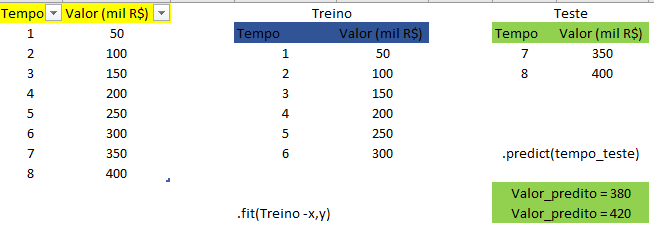

X_train --> tempo azul;

X_test --> tempo verde;

y_train --> valor azul;

y_teste --> valor verde;

In [446]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

Vamos verificar se as features (colunas) são relevantes pro modelo usando o modelo OLS

In [447]:
treino.head()

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,ExterQual,SalePrice
0,-0.359601,-0.207698,0.646183,0.413547,0.306418,0.349364,-0.443078,-0.773861,0.781366,0.986849,1.046258,0.896833,3,2,208500.0
1,-0.359601,-0.207698,-0.063185,-0.471891,0.306418,-0.058991,0.477463,0.261075,0.781366,-0.287758,0.154764,-0.395604,3,3,181500.0
2,-0.359601,-0.207698,0.646183,0.563755,0.306418,0.627787,-0.297968,-0.610718,0.781366,-0.287758,0.980221,0.848965,0,2,223500.0
3,3.874967,-0.207698,0.646183,0.427382,1.619830,0.785561,-0.669812,-0.506205,-1.027363,0.349546,-1.859351,-0.682812,0,3,140000.0
4,-0.359601,-0.207698,1.355551,1.378042,1.619830,1.685798,0.212184,-0.037170,0.781366,1.624153,0.947203,0.753229,0,2,250000.0


A coluna 1stFlrSF está dando erro pois tem um numero entre as letras, não sei a justificativa, porém irei renomear essa coluna 

Aplicar o modelo de Regressão Linear. Vou aplicar o Random Florest que foi o indicado

In [448]:
treino.rename(columns={'1stFlrSF':'FirstFloor'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [449]:
import statsmodels.formula.api as smf
function='SalePrice~EnclosedPorch + KitchenAbvGr + OverallQual + GrLivArea + GarageCars + GarageArea + TotalBsmtSF + FirstFloor + FullBath + TotRmsAbvGrd + YearBuilt + YearRemodAdd + LotShape + ExterQual'
model=smf.ols(formula=function, data=treino).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     392.3
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:25:17   Log-Likelihood:                -17399.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1445   BIC:                         3.491e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.264e+05   5039.601     44.924

Vamos remover as colunas que possuirem P-valeu > 10% ou seja 0.1. Removo dos maiores, um por um, até não ter mais nenhum acima de 10%

In [450]:
import statsmodels.formula.api as smf
function='SalePrice~EnclosedPorch + KitchenAbvGr + OverallQual + GrLivArea + GarageCars + TotalBsmtSF + FirstFloor + FullBath + TotRmsAbvGrd + YearBuilt + YearRemodAdd + LotShape + ExterQual'
model=smf.ols(formula=function, data=treino).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     422.4
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:25:17   Log-Likelihood:                -17399.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1446   BIC:                         3.490e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.266e+05   5035.341     45.005

In [451]:
import statsmodels.formula.api as smf
function='SalePrice~KitchenAbvGr + OverallQual + GrLivArea + GarageCars + TotalBsmtSF + FirstFloor + YearBuilt + YearRemodAdd + LotShape + ExterQual'
model=smf.ols(formula=function, data=treino).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     547.7
Date:                Fri, 03 Mar 2023   Prob (F-statistic):               0.00
Time:                        19:25:17   Log-Likelihood:                -17402.
No. Observations:                1460   AIC:                         3.483e+04
Df Residuals:                    1449   BIC:                         3.488e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.267e+05   5038.344     44.989   

R² é o coeficiente de determinação que pode ser calculado pelo quadrado de coeficiente de correlação. Quanto maior o R² melhor o modelo de regressão, ou seja melhor acurácia. R² varia de 0 a 1. R² acima de -,5 já indicam bom ajuste. Expressa o quanto o modelo consegue explicar o comportamento das variáveis.Observe que R-squared(R quadrado) consegue prever em 95.40% a variabilidade das duas variáveis(x,y). O intercepte é a const = 90.00 e o tempo é 5.00, ou seja
y = b + ax = (90 + 5x)

Agora vamos aplicar o Random Florest

In [452]:
from sklearn.ensemble import RandomForestRegressor

regressor= RandomForestRegressor(n_estimators = 100, random_state = 0)
 
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

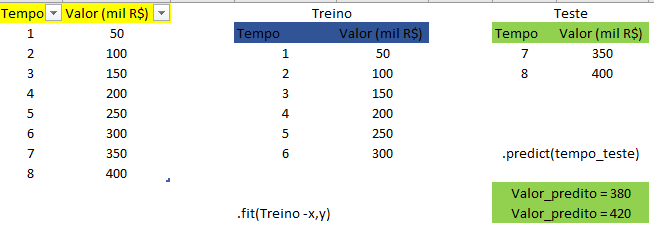

In [453]:
from sklearn import metrics

Prever os resultados dos testes, pra comparar o predito com o real

In [454]:
y_pred_test=regressor.predict(X_test)
print('MAE: ',metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE: ',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE:  18910.656874103068
MSE:  962737048.809084
RMSE:  31028.004267259665


MAE erro médio absoluto, significa que ele previu com erro de $ 18.910,65 do preço real de cada imóvel;

Criando uma coluna chamada predict que vai receber o valor da predição

In [455]:
X_test['Predict']=y_pred_test

In [456]:
X_test['Real'] = y_test.to_frame().SalePrice

In [457]:
X_test['Erro'] = y_test.to_frame().SalePrice - y_pred_test

In [458]:
X_test

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,ExterQual,Predict,Real,Erro
529,2.754052,4.455931,-0.063185,2.004568,0.306418,0.052378,2.230119,3.455101,2.590094,1.624153,-0.472583,-0.443472,0,2,208937.900000,200624.0,-8313.900000
491,0.138584,-0.207698,-0.063185,0.152659,-1.006994,-1.079879,-0.556445,-0.513853,-1.027363,-0.925062,-1.000876,-1.640173,3,3,132017.870000,133000.0,982.130000
459,3.501329,-0.207698,-0.772552,-0.588500,-1.006994,-0.560154,-0.776377,-0.460321,-1.027363,-0.925062,-0.703711,-1.640173,0,3,114980.710000,110000.0,-4980.710000
279,-0.359601,-0.207698,0.646183,1.030191,0.306418,0.149827,0.246194,-0.009130,0.781366,0.986849,0.187782,-0.347736,3,3,222439.500000,192000.0,-30439.500000
655,-0.359601,-0.207698,-0.063185,-0.807883,-1.006994,-0.968509,-1.193568,-1.617614,-1.027363,-0.287758,-0.010327,-0.634944,3,3,90602.166667,88000.0,-2602.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,-0.359601,-0.207698,2.774287,2.518439,0.306418,1.889976,0.420780,0.921292,2.590094,1.624153,-2.585753,0.753229,3,0,396230.440000,325000.0,-71230.440000
1245,-0.359601,-0.207698,-0.063185,0.725822,0.306418,0.019895,-1.057528,-0.049916,2.590094,0.349546,0.418910,0.896833,3,3,184567.100000,178000.0,-6567.100000
1390,-0.359601,-0.207698,0.646183,0.047909,0.306418,0.316881,1.073774,0.931489,0.781366,-0.287758,0.947203,0.753229,3,2,222626.610000,235000.0,12373.390000
1375,-0.359601,-0.207698,1.355551,0.138824,1.619830,1.156793,1.178072,1.048748,0.781366,0.349546,1.178331,1.088305,0,2,256012.710000,239000.0,-17012.710000


In [459]:
teste

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,ExterQual,SalePrice
1460,-0.359601,-0.207698,-0.772552,-1.195262,-1.006994,1.193916,-0.384127,-0.671897,-1.027363,-0.925062,-0.340510,-1.113625,3,3,NaN
1461,-0.359601,-0.207698,-0.063185,-0.339470,-1.006994,-0.745770,0.629375,0.431865,-1.027363,-0.287758,-0.439565,-1.257229,0,3,NaN
1462,-0.359601,-0.207698,-0.772552,0.253457,0.306418,0.043097,-0.279829,-0.590326,0.781366,-0.287758,0.848148,0.657493,0,3,NaN
1463,-0.359601,-0.207698,-0.063185,0.204046,0.306418,-0.012587,-0.284364,-0.595424,0.781366,0.349546,0.881166,0.657493,0,3,NaN
1464,-0.359601,-0.207698,1.355551,-0.436315,0.306418,0.154467,0.518275,0.306959,0.781366,-0.925062,0.683057,0.370284,0,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.359601,-0.207698,-1.481920,-0.807883,-2.320407,-2.193574,-1.145954,-1.564083,-1.027363,-0.925062,-0.043346,-0.682812,3,3,NaN
2915,-0.359601,-0.207698,-1.481920,-0.807883,-1.006994,-0.866421,-1.145954,-1.564083,-1.027363,-0.287758,-0.043346,-0.682812,3,3,NaN
2916,-0.359601,-0.207698,-0.772552,-0.546995,0.306418,0.479295,0.391304,0.164209,-1.027363,0.349546,-0.373528,0.561757,3,3,NaN
2917,-0.359601,-0.207698,-0.772552,-1.049006,-2.320407,-2.193574,-0.316107,-0.483263,-1.027363,-0.287758,0.683057,0.370284,3,3,NaN


Observe que o dataset teste quando separado do dataset treino, ficou com a coluna SalePrice valores nulos, pra resolver isto precisamos remover pq ela é a variável que queremos predizer

In [460]:
teste.drop('SalePrice', axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Predizendo os valores de y_teste

In [461]:
y_pred_teste=regressor.predict(teste)

Atribuímo uma uma nova coluna

In [462]:
teste['SalePrice']=y_pred_teste

<ipython-input-462-a1586c8e1134>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teste['SalePrice']=y_pred_teste


In [463]:
teste

,EnclosedPorch,KitchenAbvGr,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,LotShape,ExterQual,SalePrice
1460,-0.359601,-0.207698,-0.772552,-1.195262,-1.006994,1.193916,-0.384127,-0.671897,-1.027363,-0.925062,-0.340510,-1.113625,3,3,123309.240000
1461,-0.359601,-0.207698,-0.063185,-0.339470,-1.006994,-0.745770,0.629375,0.431865,-1.027363,-0.287758,-0.439565,-1.257229,0,3,139461.500000
1462,-0.359601,-0.207698,-0.772552,0.253457,0.306418,0.043097,-0.279829,-0.590326,0.781366,-0.287758,0.848148,0.657493,0,3,177635.800000
1463,-0.359601,-0.207698,-0.063185,0.204046,0.306418,-0.012587,-0.284364,-0.595424,0.781366,0.349546,0.881166,0.657493,0,3,183330.000000
1464,-0.359601,-0.207698,1.355551,-0.436315,0.306418,0.154467,0.518275,0.306959,0.781366,-0.925062,0.683057,0.370284,0,2,216510.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,-0.359601,-0.207698,-1.481920,-0.807883,-2.320407,-2.193574,-1.145954,-1.564083,-1.027363,-0.925062,-0.043346,-0.682812,3,3,81656.666667
2915,-0.359601,-0.207698,-1.481920,-0.807883,-1.006994,-0.866421,-1.145954,-1.564083,-1.027363,-0.287758,-0.043346,-0.682812,3,3,84442.000000
2916,-0.359601,-0.207698,-0.772552,-0.546995,0.306418,0.479295,0.391304,0.164209,-1.027363,0.349546,-0.373528,0.561757,3,3,145254.610000
2917,-0.359601,-0.207698,-0.772552,-1.049006,-2.320407,-2.193574,-0.316107,-0.483263,-1.027363,-0.287758,0.683057,0.370284,3,3,108024.000000


Pegando os valores originais do dataset pq tinhámos cancelado a coluna ID

In [464]:
teste2 = pd.read_csv('/content/test.csv')

Pego a coluna só com os ID

In [465]:
teste2 = teste2['Id']

.to_frame() quando pego uma coluna em específico ele fica no formato de séries, preciso passar pra dataframe

In [466]:
teste2 = teste2.to_frame()

Pego todas as colunas do preço

In [467]:
teste = teste['SalePrice']

In [468]:
teste = teste.to_frame()

Resetando index pq o teste tava unido com treino, ele ficou com números acima do primeiro ID do dataset treino e exclui ele.

In [469]:
teste=teste.reset_index()
teste.drop('index',axis=1, inplace=True)

Verificar se os dois estão com mesmo index

In [470]:
display(teste2)
teste

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


,SalePrice
0,123309.240000
1,139461.500000
2,177635.800000
3,183330.000000
4,216510.350000
...,...
1454,81656.666667
1455,84442.000000
1456,145254.610000
1457,108024.000000


Unindo as duas tabelas ID e SalePrice

In [471]:
submissao_kaggle = pd.merge(teste2, teste, left_index=True, right_index=True)
submissao_kaggle

,Id,SalePrice
0,1461,123309.240000
1,1462,139461.500000
2,1463,177635.800000
3,1464,183330.000000
4,1465,216510.350000
...,...,...
1454,2915,81656.666667
1455,2916,84442.000000
1456,2917,145254.610000
1457,2918,108024.000000


Formato csv pra poder ser enviado pro Kaggle

In [472]:
submissao_kaggle.to_csv('submissao_house_price.csv',index=False)

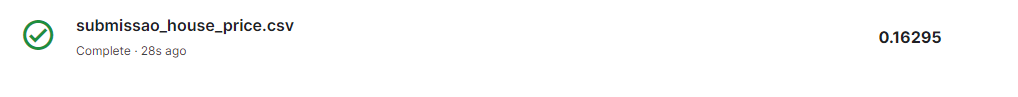

Erro no preço foi de aproximadamente 16%